# Libraries

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder as oe
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Objective

With this .ipynb file, our goal is to obtain the .csv file for the test data and the .csv file for the training data with updated information, enabling us to work more effectively when creating the models and, in this way, achieve the best possible AUC (Area Under the Curve). 

# Load the data

In [2]:
training_features_data = pd.read_csv("datasets_originales/training_set_features.csv", sep=',')
training_set_labels = pd.read_csv("datasets_originales/training_set_labels.csv", sep=',')
test_features_data = pd.read_csv("datasets_originales/test_set_features.csv", sep=',')

The training and test datasets are loaded from CSV files.

# Preprocessing for training_features_data

In this section, null values are removed, and feature encoding and normalization are performed for the training dataset. We will impute null values because otherwise, we will lose a lot of data in our dataset.

In [3]:
training_features_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

## Remove Null Values

The numeric columns are filled with -1 and the categorical columns with 'out-of-category'.

We have decided to impute the missing values with -1 and 'out-of-category' because we still want to maintain the information that the data is missing, but imputed by a value to avoid losing data.

In [4]:
numerical_cols = training_features_data.select_dtypes(include=['number']).columns
training_features_data[numerical_cols] = training_features_data[numerical_cols].fillna(value=-1)

categorical_cols = training_features_data.select_dtypes(include=['object']).columns
training_features_data[categorical_cols] = training_features_data[categorical_cols].fillna('out-of-category')

Verify that there are no remaining null values.

In [5]:
training_features_data.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

## Categorical Feature Encoding

In [6]:
training_features_data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

Now, what we will do is transform the categorical features of the training dataset into numerical values using an ordinal encoder. First, it learns the mapping of each category to a number with the fit method, then applies this mapping to the categorical columns of the dataset with the transform method. Finally, it creates a new DataFrame with the transformed data, keeping the original column names. This allows the categorical features to be used in our models.

In [4]:
enc = oe()
enc.fit(training_features_data)
training_features_data_arr = enc.transform(training_features_data)

col_names_list = training_features_data.columns
encoded_categorical_df = pd.DataFrame(training_features_data_arr, columns=col_names_list)

## Normalization

Now, we will normalize the numerical features of the transformed dataset. First, the StandardScaler is used to adjust the values so that they have a mean of 0 and a standard deviation of 1. The fit method calculates the mean and standard deviation for each column, and the transform method applies this scaling to the data. Finally, a new DataFrame is created with the normalized data, keeping the original column names.

We have decided to normalize the data to avoid the problem of different scales in the features, which can lead to poor performance in some machine learning algorithms. Furthermore, some models require the data to be normalized to work well, so instead of having categorical data that could be worse for some models, we have decided to normalize the data.

In [5]:
scaler = StandardScaler()
scaler.fit(encoded_categorical_df)
normalized_arr = scaler.transform(encoded_categorical_df)
normalized_df = pd.DataFrame(normalized_arr, columns=col_names_list)

## Target Plots

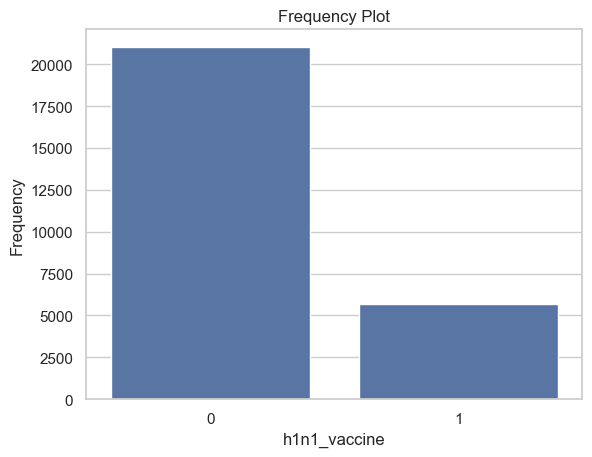

In [9]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Create a count plot
ax = sns.countplot(x='h1n1_vaccine', data=training_set_labels)

# Set the title and labels of the plot
ax.set_title('Frequency Plot')
ax.set_xlabel('h1n1_vaccine')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

As we can see, the target variable is imbalanced, so in order to achieve a better performance, it is recommended to balance the target variable or provide a weight to the model. In our case, in some models we have tried, there is a parameter to either put a weight in the classes or to balance the classes.

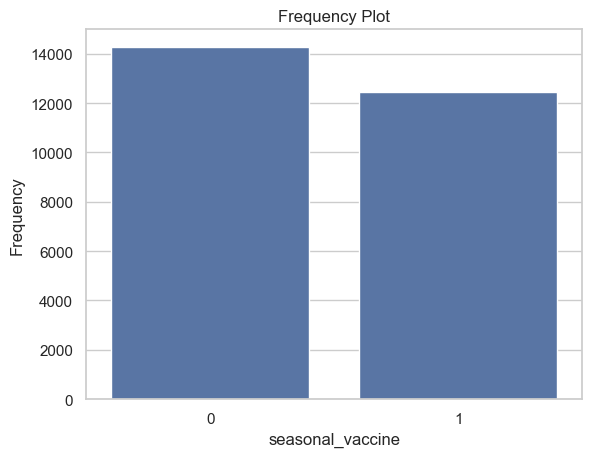

In [10]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Create a count plot
ax = sns.countplot(x='seasonal_vaccine', data=training_set_labels)

# Set the title and labels of the plot
ax.set_title('Frequency Plot')
ax.set_xlabel('seasonal_vaccine')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

In this target, we have a quite balance distribution, so we will not balance the target variable.

## Correlation matrix

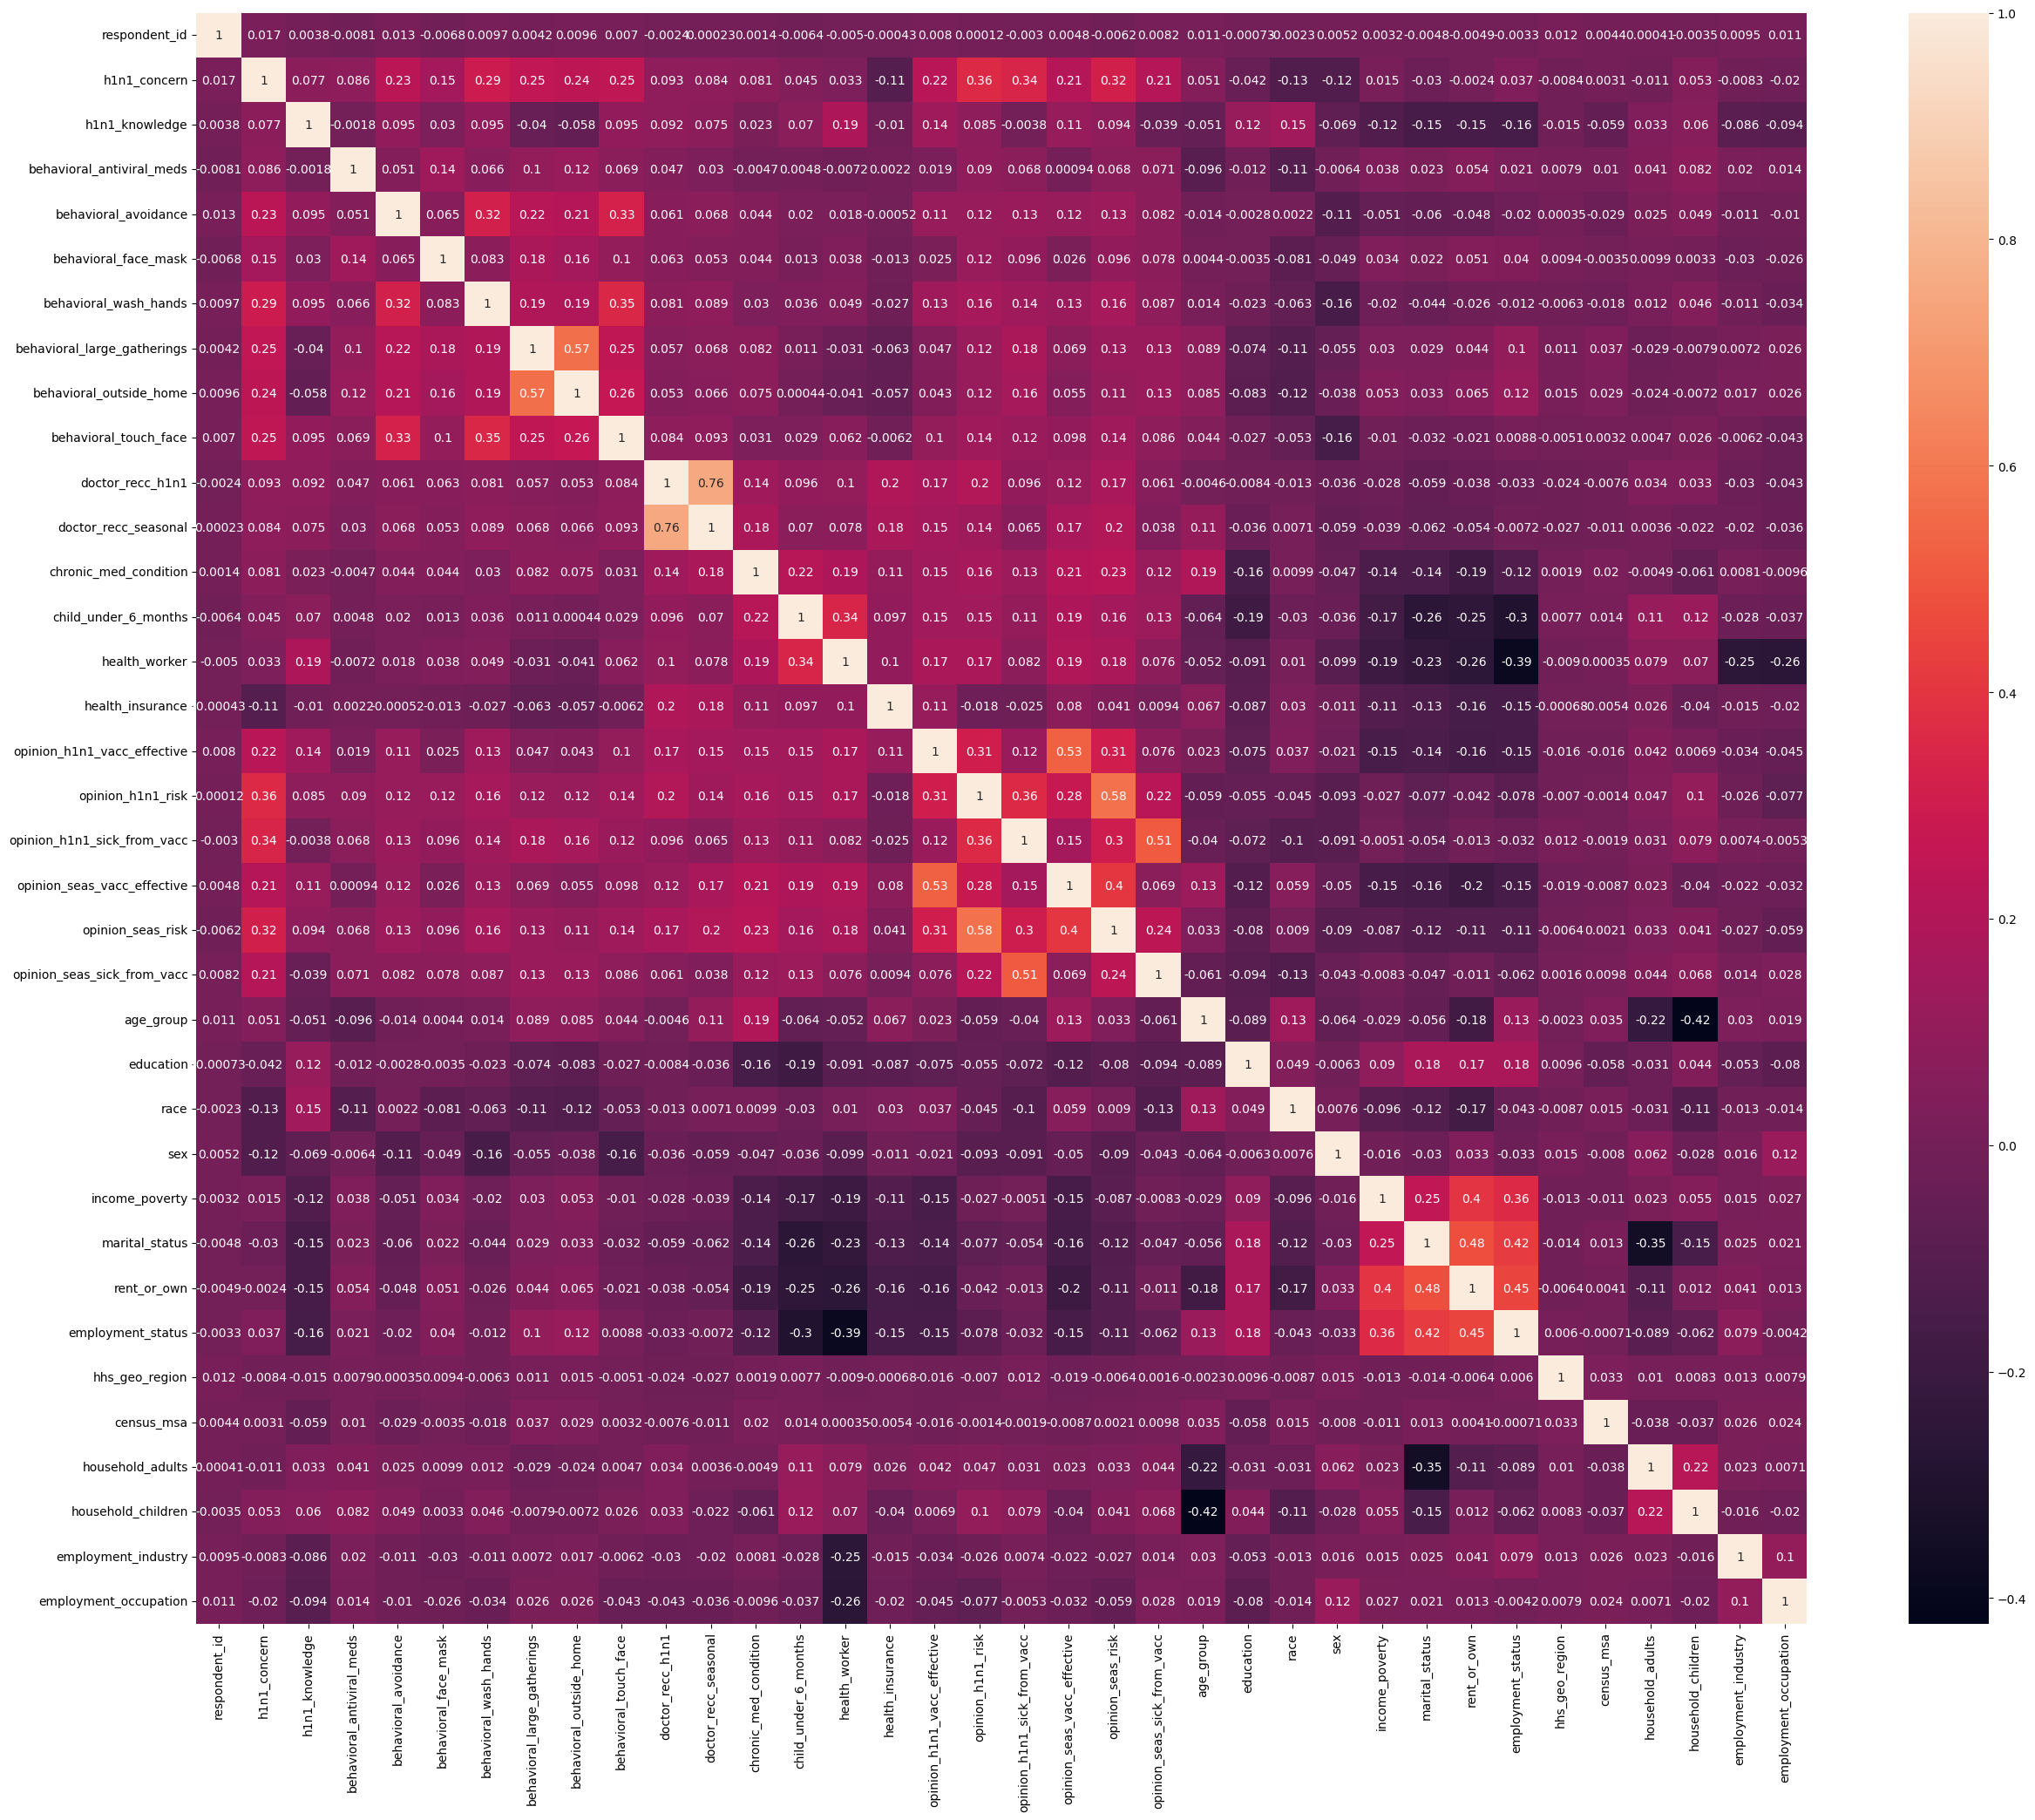

In [7]:
plt.figure(figsize=(30, 24))
corrmat = normalized_df.corr()
sns.heatmap(corrmat, square = True, annot=True)
plt.show()

As we can see, we have not a high correlation between the features (tipically > 0.7 or < -0.7), so in practice, we are going to keep all the features because at least we dont have the same information due to high correlated features.

## Pairplot 

In [8]:
sns.pairplot(normalized_df)

# Preprocessing for test_features_data

It follows the same process as the preprocessing for the training data, but with the test dataset (test_features_data).

## Remove Null Values

In [6]:
numerical_cols = test_features_data.select_dtypes(include=['number']).columns
test_features_data[numerical_cols] = test_features_data[numerical_cols].fillna(value=-1)

categorical_cols = test_features_data.select_dtypes(include=['object']).columns
test_features_data[categorical_cols] = test_features_data[categorical_cols].fillna('out-of-category')

Verify that there are no remaining null values.

In [12]:
test_features_data.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

## Categorical Feature Encoding

In [7]:
enc = oe()
enc.fit(test_features_data)
test_features_data_arr = enc.transform(test_features_data)

col_names_list = test_features_data.columns
test_encoded_categorical_df = pd.DataFrame(test_features_data_arr, columns=col_names_list)

## Normalization

In [8]:
test_normalized_arr = scaler.transform(test_encoded_categorical_df)
test_normalized_df = pd.DataFrame(test_normalized_arr, columns=col_names_list)

# Approach

In relation of what models are we going to use, we have decided to create a model for each target, because it is possible that the features that are important for one target are not important for another target.

After trying several models, as we can see in the directory 'other_models_used', we have needed to seek for a approach that could try diferent models and hyperparameters, so we have decided to use the library h2o (AutoML), that allows us to try different models and hyperparameters in a easy way.

This approach leds us to see that the best model for both targets is a esemble model, using different models such as DeepLearning, XGBoost, GBM in different numbers of models and hyperparameters. (if you want to see the models from the esembles, you can see in the directory task2/tryouts/models_config).

While trying different configurations for the automl approach, the models generated by the esemble was particularly 2: DeepLearning models and Gradient Boosting Machine models. Both models are quite computational expensive and works better with complex relationships between the features and the target as well as it is easier for that models to work with continous data because avoids human error in enconding the categorical data.

We consider that in this problem esembles works better than a single model, because of the high number of features we have and the complexity of their interpretations. Having a lot of features, it is harder to find relationships between the features and the target, so we have decided to use esembles to try to find the best model. In fact, using esembles we try different models and hyperparameters for later combine their predictions to achieve better performance, so in practice, we are going to achieve a better performance than using a single model.

If we want to replicate the models, we could use the program task2/replicate_model.py, that allows us to replicate the models we have used in the training data. It is possible that we could not achieve the same performance as in the original, because we might lose information about the automl inner process to train the models, but overall the performance is similar.

# Model performance

We will evaluate the models created for each target using diferent metrics.

### H1n1 Vaccine

#### Confusion Matrix

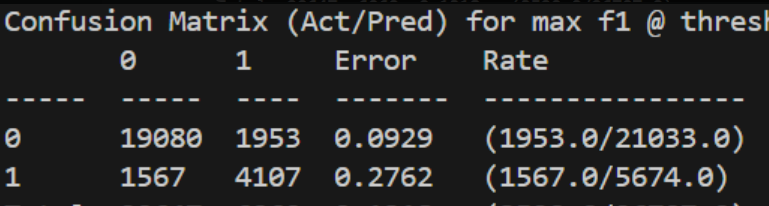

As we can see in the confusion matrix, the models predict better the 0 class than the 1 class, this has sense because the 0 class is more frequent than the 1 class, so the model has more information about the 0 class than the 1 class. However, we also have a good performance predicting the 1 class because how the handle with the imbalanced target variable.

#### F1-Score
The following f1-score gathered from the implementation of automl approach is:

**[[0.34565107722367205, 0.7000170444861087]]**

with the first number belong to the 0 class and the second number belong to the 1 class.

We can see something odd in the f1-score for the 0 class, because it is quite low but in the confusion matrix we can see that the model predict well the 0 class. It results, than doing the calculus by myself, the real f1-score for the 0 class is 0.915 while the class 1 is well calculated by the automl approach.

f1-score = 2 * (precision * recall) / (precision + recall)

Precisión = VP / (VP + FP)

Recall = VP / (VP + FN)

Precisión = 19080 / (19080 + 1567) = 0.924

Recall = 19080 / (19080 + 1953) = 0.907

F1 (class 0) = 2 * (0.924 * 0.907) / (0.924 + 0.907)
= 2 * 0.838 / 1.831
= 1.676 / 1.831
= **0.915**

#### ROC Curve and AUC

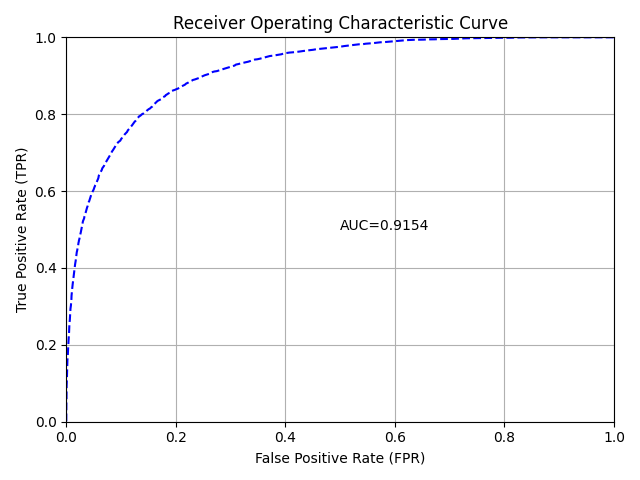

We can see a pretty good AUC for the model, but does not reflect the auc achieve in the competition, it is possible that the models used in the esemble are overfitted by the training data, because we use all the training set to train the model or for the excesive training time we have used.

At the beginning of the plot, we saw that the model identifies quite easy the true positives before it starts to identify false positives.

### Seasonal Vaccine

#### Confusion Matrix

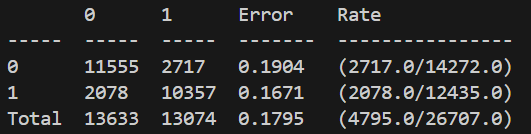

In this target, as we have more balanced data, we can see that the model predict well both classes, but this time the model predict better the 1 class than the 0 class becasue there is less error made.

#### F1-Score
The following f1-score gathered from the implementation of automl approach is:

**[[0.44438234356591666, 0.8120271276804266]]**

As we saw in the H1n1 Vaccine target, the f1-score for the 0 class is not well calculated, so we are going to calculate it by ourselves to see the real f1-score.

f1-score = 2 * (precision * recall) / (precision + recall)

Precisión = 11555 / (11555 + 2078) = 0.848

Recall = 11555 / (11555 + 2717) = 0.810

F1 (class 0) = 2 * (0.848 * 0.810) / (0.848 + 0.810)
= 2 * 0.687 / 1.658
= **0.828**

#### ROC Curve and AUC
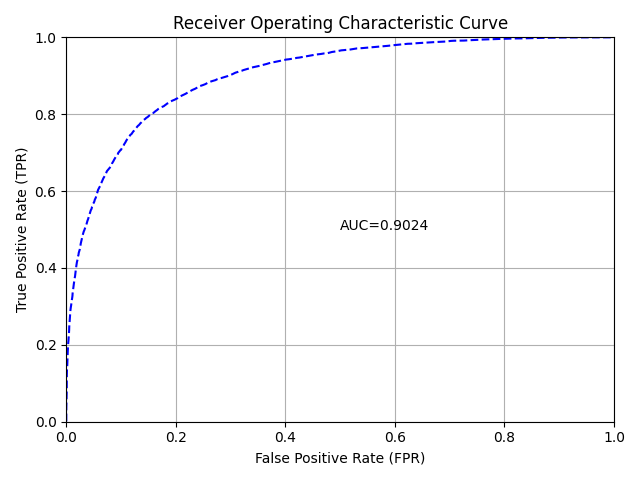

We have a quite similar roc curve and AUC than the H1n1 Vaccine target, so the interpretation is the same.

# Position

We have achieved the rank 416 with a score of 0.8610

# Discussion

## Performance Analysis

Our model achieved a mid-high position in the competition, ranking 416th out of 2008 teams, with a score of 0.8610. Although this demonstrates that the model performed well, especially compared to most participants, there is still room for improvement, considering that the highest score was 0.8658.

The use of AutoML greatly helped us improve our score compared to manually testing different models such as Random Forest, Decision Tree, KNN, and Neural Networks. Additionally, it saved us time in finding the optimal parameters for each model. After applying AutoML, the most prominent models were those based on Deep Learning and Gradient Boosting.

As a weakness, we could mention that AutoML does not fully account for the feature selection process. However, we addressed this by using mutual information to measure the statistical dependence between each feature and the target, allowing us to identify the most important features for each target.

To clarify, MI (Mutual Information) measures how much our uncertainty about the target variable Y is reduced when we know the value of feature X, resulting in a value between 0 (when variables are completely independent) and 1 (when there is total dependence). This measure is especially useful because it can detect both simple (linear) and complex (nonlinear) relationships between variables, and works well even when we transform the data monotonically (for example, when scaling or normalizing) and doesn't require the data to follow any particular distribution, making it more reliable than other methods like Pearson correlation. In practice, we use MI to rank features according to how well they help us predict our target variable, allowing us to keep the most important features and discard those that don't provide useful information or are redundant.

## Insights into Modeling Decisions

We chose AutoML with the intention of achieving greater optimization, which we were not able to obtain manually. Testing such a large number of models with different parameters proved to be very time-consuming, and AutoML offered an efficient solution to this challenge.

AutoML contributed positively to our performance, as the best result we achieved without it—by manually testing models—was approximately 0.8550. By using AutoML, our score improved by around 0.006, demonstrating its effectiveness in refining model performance.

## Challenges and Limitations

Submission Format Misunderstanding:
One of the main limitations we faced initially was the misunderstanding that the result to be submitted to the competition platform needed to be rounded to one decimal place, as indicated by the submission_format.csv file. This significantly reduced the precision of our model and, consequently, its performance. Once this issue was clarified, our results improved.

Another limitation was that we initially used a KNN imputer to handle missing values. However, we later observed that this approach negatively affected our results. We switched to a simpler yet more effective strategy, which consists of replacing missing numeric values with -1 and categorical values with out-of-category.



### Possible Improvements:

We believe that the main difference between our performance and that of the top-ranked team lies more in the data preprocessing techniques than in the choice of the model itself. While AutoML optimized the model well, further refinements in feature engineering and data preparation could have yielded better results.

## Conclusion

In conclusion, our model performed relatively well in the competition, securing a mid-high position in 416th place out of 2008 teams, with a score of 0.8610. While the result is positive, there is still room for improvement, especially considering that the first-place score was 0.8658.

The use of AutoML proved to be a valuable tool, allowing us to efficiently explore multiple algorithms and fine-tune hyperparameters without spending excessive time on manual model selection.

However, the process was not as straightforward as we expected. Before applying AutoML, we had to optimally adjust feature selection and test several models manually.

Ultimately, we believe the difference between our model and the leaders in the rankings lies more in potential improvements in the feature preprocessing rather than in the model itself.

Looking ahead, we could focus on optimizing the preprocessing phase as much as possible in order to achieve a performance improvement.